In [16]:
import pandas as pd
from collections import Counter 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [17]:
df = pd.read_csv("momo_review_clean_balanced.csv")

X_text = df["Noi_dung_sach_giu_dau"]
y_label = df["Nhãn"]

## TF - IDF


In [18]:
vectorizer = TfidfVectorizer()
X_tfid = vectorizer.fit_transform(X_text)
ros = RandomOverSampler(random_state= 42)
X_ros, Y_ros = ros.fit_resample(X_tfid, y_label)


smote = SMOTE(random_state = 42)
X_balanced, y_balenced = smote.fit_resample(X_ros, Y_ros)

print(Counter(y_balenced))


Counter({'Tiêu cực': 35936, 'Tích cực': 35936, 'Trung lập': 35936})


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balenced, stratify = y_balenced, test_size = 0.2, random_state = 42 
)

In [20]:
model = LogisticRegression(max_iter = 1000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

              precision    recall  f1-score   support

    Tiêu cực       0.83      0.83      0.83      7187
   Trung lập       0.74      0.72      0.73      7187
    Tích cực       0.78      0.80      0.79      7188

    accuracy                           0.79     21562
   macro avg       0.79      0.79      0.79     21562
weighted avg       0.79      0.79      0.79     21562



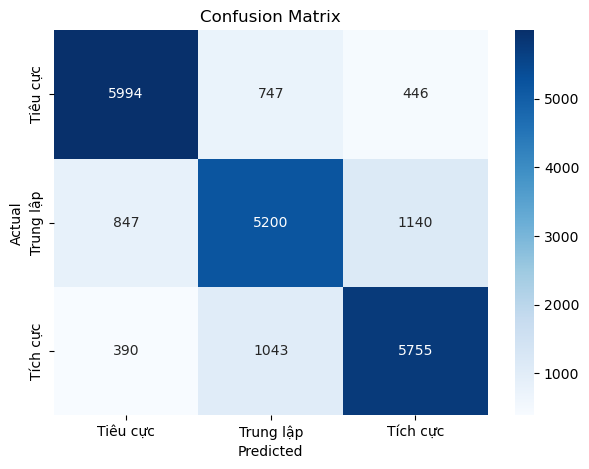

In [21]:
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

cfs_matrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(7, 5))
sns.heatmap(cfs_matrix, annot=True, fmt='d', 
            xticklabels=model.classes_, 
            yticklabels=model.classes_, 
            cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## LOGISTIC REGRESSION, SVM, NAIVE BAYES, RANDOM FOREST, KNN 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balenced, stratify = y_balenced, test_size = 0.2, random_state = 42 
)

In [23]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM (Linear)": LinearSVC(dual=True),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

In [24]:
# Huấn luyện và đánh giá từng mô hình
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    results.append({"Model": name, "Accuracy": acc, "F1-macro": f1})
    
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))



=== Logistic Regression ===
              precision    recall  f1-score   support

    Tiêu cực       0.83      0.83      0.83      7187
   Trung lập       0.74      0.72      0.73      7187
    Tích cực       0.78      0.80      0.79      7188

    accuracy                           0.79     21562
   macro avg       0.78      0.79      0.78     21562
weighted avg       0.78      0.79      0.78     21562


=== Naive Bayes ===
              precision    recall  f1-score   support

    Tiêu cực       0.79      0.78      0.78      7187
   Trung lập       0.67      0.69      0.68      7187
    Tích cực       0.75      0.74      0.74      7188

    accuracy                           0.74     21562
   macro avg       0.74      0.74      0.74     21562
weighted avg       0.74      0.74      0.74     21562


=== SVM (Linear) ===
              precision    recall  f1-score   support

    Tiêu cực       0.84      0.86      0.85      7187
   Trung lập       0.78      0.75      0.76      7187
   

In [25]:

# Tạo bảng từ kết quả
results_df = pd.DataFrame(results)

results_df.style.set_caption("BẢNG SO SÁNH HIỆU SUẤT") \
    .format({"Accuracy": "{:.2%}", "F1-macro": "{:.2%}"}) \
    .set_table_styles([{"selector": "th", "props": [("text-align", "center")]}]) \
    .set_properties(**{"text-align": "center"})


,Model,Accuracy,F1-macro
0,Logistic Regression,78.52%,78.49%
1,Naive Bayes,73.57%,73.63%
2,SVM (Linear),80.78%,80.73%
3,Random Forest,97.51%,97.51%
4,KNN (k=5),87.00%,86.95%
